# First of all, Get your Data
## Identify the Type of Problem
### - Predict a value? (The price, how many, how much)
### - Yes or No? (The product is good or bad, cancer or no cancer, Dog or Cat)
### - Predict a class? (Grade A, Grade B, Grade C, Grade D items)

In [1]:
%matplotlib inline
import pandas as pd

df = pd.read_csv("simplified_lemoncars_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43789 entries, 0 to 43788
Data columns (total 18 columns):
Lemon?                               43789 non-null int64
Vehicle Year                         43789 non-null int64
Vehicle Age                          43789 non-null int64
Transmission                         43783 non-null object
WheelType                            41904 non-null object
VehOdo                               43789 non-null int64
Size                                 43784 non-null object
MMRAcquisitionAuctionAveragePrice    43775 non-null float64
MMRAcquisitionAuctionCleanPrice      43775 non-null float64
MMRAcquisitionRetailAveragePrice     43775 non-null float64
MMRAcquisitonRetailCleanPrice        43775 non-null float64
MMRCurrentAuctionAveragePrice        43598 non-null float64
MMRCurrentAuctionCleanPrice          43598 non-null float64
MMRCurrentRetailAveragePrice         43598 non-null float64
MMRCurrentRetailCleanPrice           43598 non-null float64
Ve

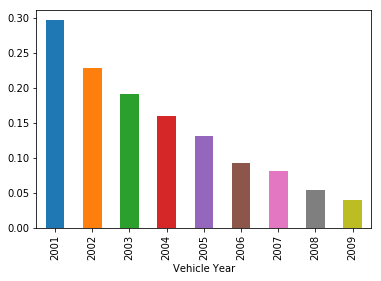

In [2]:
df.groupby("Vehicle Year")['Lemon?'].mean().plot(kind='bar')

# Next Step, Data Cleaning and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43789 entries, 0 to 43788
Data columns (total 18 columns):
Lemon?                               43789 non-null int64
Vehicle Year                         43789 non-null int64
Vehicle Age                          43789 non-null int64
Transmission                         43783 non-null object
WheelType                            41904 non-null object
VehOdo                               43789 non-null int64
Size                                 43784 non-null object
MMRAcquisitionAuctionAveragePrice    43775 non-null float64
MMRAcquisitionAuctionCleanPrice      43775 non-null float64
MMRAcquisitionRetailAveragePrice     43775 non-null float64
MMRAcquisitonRetailCleanPrice        43775 non-null float64
MMRCurrentAuctionAveragePrice        43598 non-null float64
MMRCurrentAuctionCleanPrice          43598 non-null float64
MMRCurrentRetailAveragePrice         43598 non-null float64
MMRCurrentRetailCleanPrice           43598 non-null float64
Ve

# in total, wee need to have 43789 entries, the columns that have less than 43789 have missing values

In [4]:
pd.value_counts(df['Transmission'].values, sort=False)

Manual        1
MANUAL     1578
AUTO      42204
dtype: int64

In [5]:
df = df.replace('Manual', 'MANUAL')

In [6]:
pd.value_counts(df['Transmission'].values, sort=False)

MANUAL     1579
AUTO      42204
dtype: int64

In [7]:
pd.value_counts(df['WheelType'].values, sort=False)

Covers     19874
Alloy      21595
Special      435
dtype: int64

In [8]:
pd.value_counts(df['Size'].values, sort=False)

MEDIUM SUV      4808
LARGE           5255
SPORTS           473
VAN             3529
LARGE TRUCK     1919
SMALL TRUCK      523
COMPACT         4321
CROSSOVER       1040
SPECIALTY       1118
MEDIUM         18552
LARGE SUV        860
SMALL SUV       1386
dtype: int64

In [9]:
values = {'Transmission' : 'AUTO', 'WheelType' : 'Alloy', 'Size' : 'Medium'}
df = df.fillna(value=values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43789 entries, 0 to 43788
Data columns (total 18 columns):
Lemon?                               43789 non-null int64
Vehicle Year                         43789 non-null int64
Vehicle Age                          43789 non-null int64
Transmission                         43789 non-null object
WheelType                            43789 non-null object
VehOdo                               43789 non-null int64
Size                                 43789 non-null object
MMRAcquisitionAuctionAveragePrice    43775 non-null float64
MMRAcquisitionAuctionCleanPrice      43775 non-null float64
MMRAcquisitionRetailAveragePrice     43775 non-null float64
MMRAcquisitonRetailCleanPrice        43775 non-null float64
MMRCurrentAuctionAveragePrice        43598 non-null float64
MMRCurrentAuctionCleanPrice          43598 non-null float64
MMRCurrentRetailAveragePrice         43598 non-null float64
MMRCurrentRetailCleanPrice           43598 non-null float64
Ve

In [10]:
df = df.fillna(df.mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43789 entries, 0 to 43788
Data columns (total 18 columns):
Lemon?                               43789 non-null int64
Vehicle Year                         43789 non-null int64
Vehicle Age                          43789 non-null int64
Transmission                         43789 non-null object
WheelType                            43789 non-null object
VehOdo                               43789 non-null int64
Size                                 43789 non-null object
MMRAcquisitionAuctionAveragePrice    43789 non-null float64
MMRAcquisitionAuctionCleanPrice      43789 non-null float64
MMRAcquisitionRetailAveragePrice     43789 non-null float64
MMRAcquisitonRetailCleanPrice        43789 non-null float64
MMRCurrentAuctionAveragePrice        43789 non-null float64
MMRCurrentAuctionCleanPrice          43789 non-null float64
MMRCurrentRetailAveragePrice         43789 non-null float64
MMRCurrentRetailCleanPrice           43789 non-null float64
Ve

## Split X and y

In [12]:
prediction = ['Lemon?']
predictor = list(df.drop(prediction, axis=1))

x = df[predictor]
y = df[prediction]

In [13]:
x = pd.get_dummies(x, prefix=['Transmission', 'WheelType', 'Size'])

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43789 entries, 0 to 43788
Data columns (total 32 columns):
Vehicle Year                         43789 non-null int64
Vehicle Age                          43789 non-null int64
VehOdo                               43789 non-null int64
MMRAcquisitionAuctionAveragePrice    43789 non-null float64
MMRAcquisitionAuctionCleanPrice      43789 non-null float64
MMRAcquisitionRetailAveragePrice     43789 non-null float64
MMRAcquisitonRetailCleanPrice        43789 non-null float64
MMRCurrentAuctionAveragePrice        43789 non-null float64
MMRCurrentAuctionCleanPrice          43789 non-null float64
MMRCurrentRetailAveragePrice         43789 non-null float64
MMRCurrentRetailCleanPrice           43789 non-null float64
VehBCost                             43789 non-null float64
IsOnlineSale                         43789 non-null int64
WarrantyCost                         43789 non-null int64
Transmission_AUTO                    43789 non-null uint8
Tra

## Split Data for Cross Validation

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)